## Import Libraries

In [213]:
import pandas  as pd
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

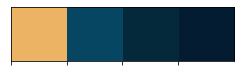

In [214]:
colors = ['#ECB365','#064663','#04293A',"#041C32"]
sns.palplot(colors)

## Load the Dataset

In [215]:
digit = load_digits()
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

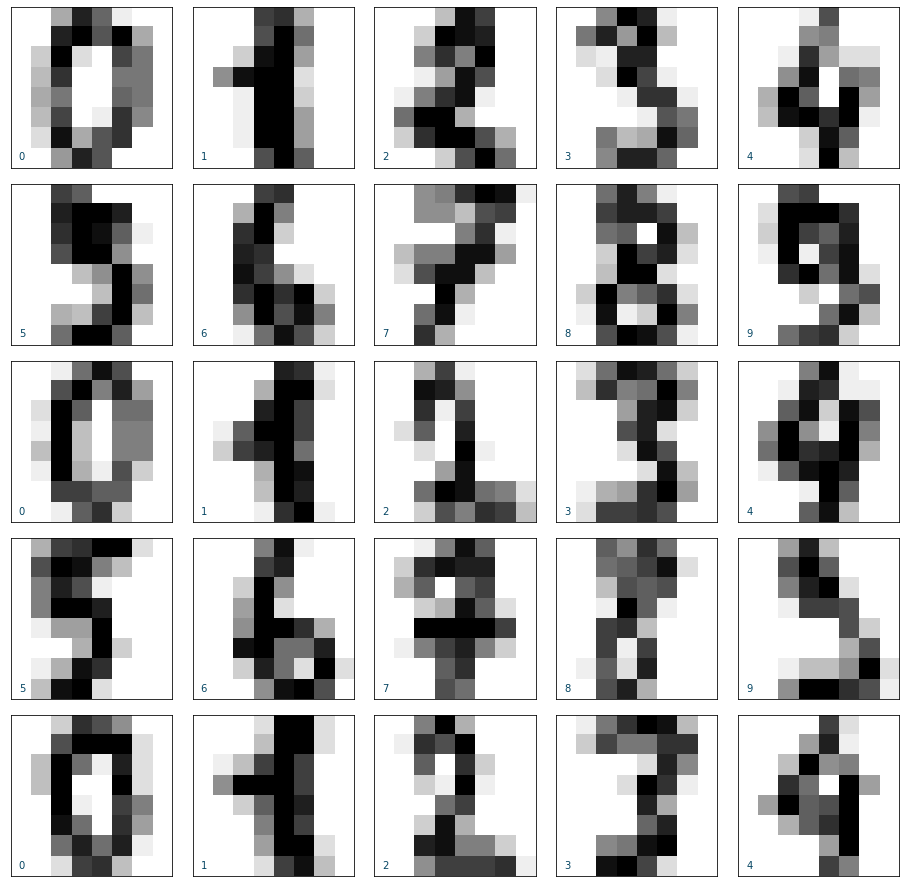

In [216]:
fig,axes = plt.subplots(5,5, figsize=(16,16),
                        subplot_kw={'xticks':[], 'yticks':[]}, 
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(digit.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05, str(digit.target[i]), transform=ax.transAxes, color=colors[1])
plt.show()

## Convert into DataFrame

In [217]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [218]:
data = pd.DataFrame(np.c_[digit.data,digit.target], columns=digit.feature_names + ['label'])
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


## Exploratory Data Analysis

In [219]:
print(data.isnull().sum().values)
print('=='*35)
print(f'\n{data.describe()}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565  

In [220]:
X = data.iloc[:,:-1].values/255
y = data['label'].values.astype(int)

In [221]:
X.shape

(1797, 64)

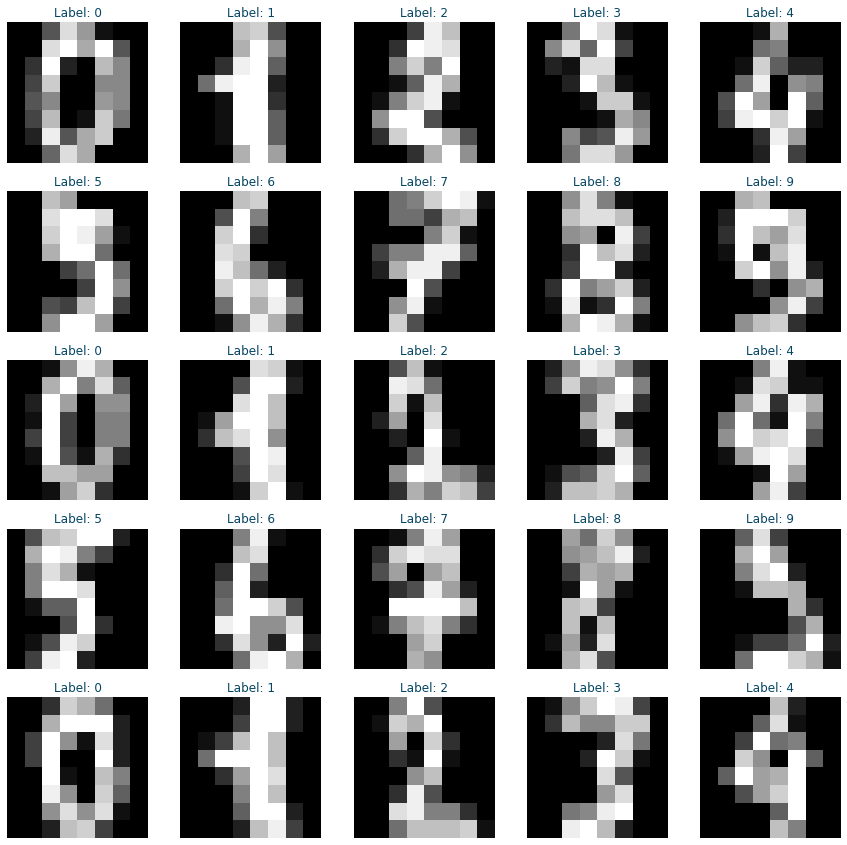

In [222]:
N = len(data)
idx = np.arange(0,26)
img, target = X[idx],y[idx]

fig, axes = plt.subplots(5,5, figsize=(15,15))
for im, label, ax in zip(img, target, axes.flatten()):
    ax.imshow(im.reshape(8,8), cmap='gray')
    ax.set_title(f"Label: {label}", color=colors[1])
    ax.axis('off')

In [223]:
X.shape

(1797, 64)

In [224]:
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)

c:\Users\247\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\247\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [225]:
print(data_projected.shape)
print(data_projected[:,0])
print(data_projected[:,1])

(1797, 2)
[ 0.63772185 -0.18342371 -0.38435724 ... -0.19714305 -0.00670262
 -0.04061529]
[ 0.10645978  0.18977013  0.08546166 ... -0.09726985 -0.28245704
 -0.14611681]


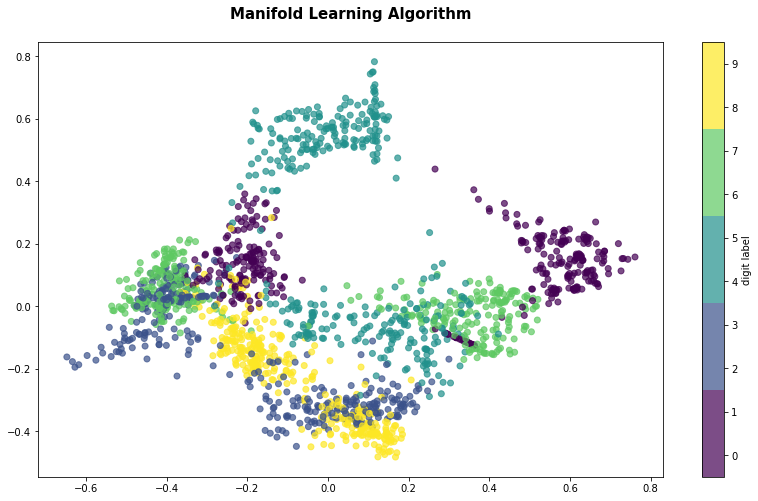

In [226]:
plt.figure(figsize=(14,8))
plt.scatter(data_projected[:,0],data_projected[:,1],c=y, edgecolors=None, alpha=0.7,
            cmap=plt.cm.get_cmap('viridis',5))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5)
plt.title('Manifold Learning Algorithm\n', fontweight = 'bold',fontsize=15);

## Modelling with GaussianNB Algorithm

In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [228]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [229]:
print(f'accuracy : {accuracy_score(y_test,y_pred)*100}%')

accuracy : 82.5%


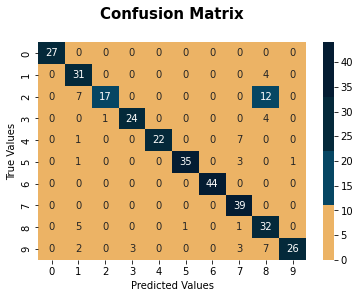

In [230]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap=colors)
plt.title('Confusion Matrix\n', fontweight = 'bold',fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

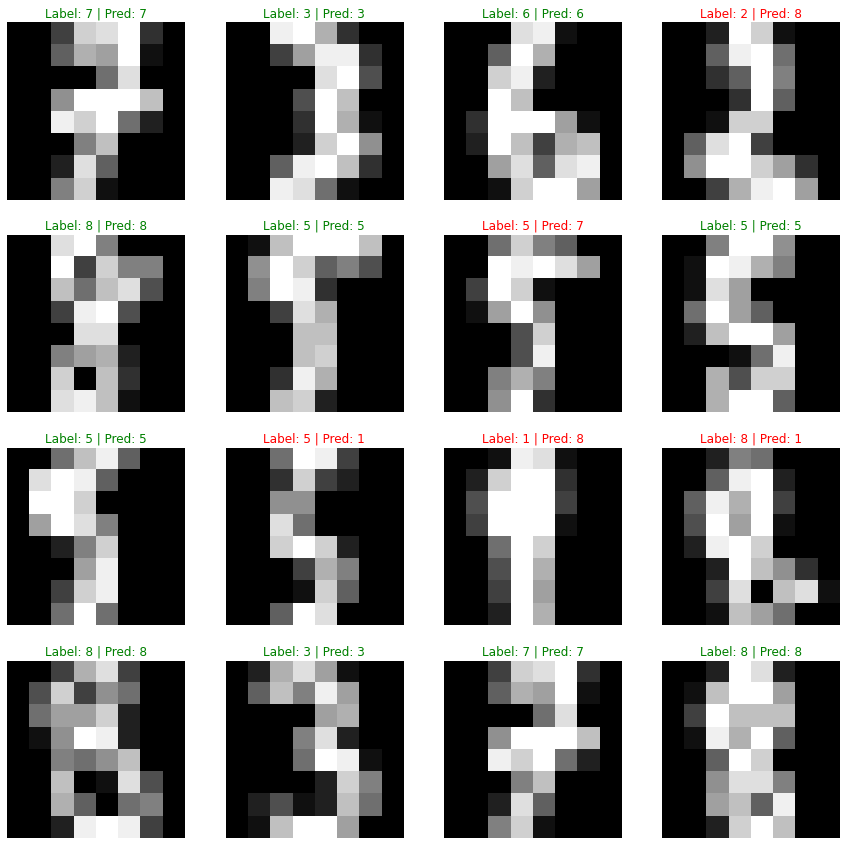

In [231]:
idx = np.random.choice(len(X_test), size=16, replace=True)
images, labels = X_test[idx], y_test[idx]
prediction = model.predict(images)

fig, axes = plt.subplots(4,4, figsize=(15,15))
for img, label, pred, ax in zip(images, labels, prediction, axes.flatten()):
    font = {'color':'g'} if label == pred else {'color':'r'}
    ax.imshow(img.reshape(8,8), cmap='gray')
    ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font)
    ax.axis('off')